In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
train = pd.read_csv("train_v9rqX0R.csv")

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
#missing values 
mean = train['Item_Weight'].mean() # the mean because the feature is numeric
train['Item_Weight'].fillna(mean, inplace =True)

In [18]:
mode = train["Outlet_Size"].mode()
train["Outlet_Size"].fillna(mode[0], inplace=True) # the mode (most frequent value of that feature) because the feature 
                                                   # is categorical 

In [23]:
# remove the ids because they have no sence 
train.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
train = pd.get_dummies(train) # like oneHotEncoder for dealing with categorical features

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   float64
 5   Item_Fat_Content_LF              8523 non-null   uint8  
 6   Item_Fat_Content_Low Fat         8523 non-null   uint8  
 7   Item_Fat_Content_Regular         8523 non-null   uint8  
 8   Item_Fat_Content_low fat         8523 non-null   uint8  
 9   Item_Fat_Content_reg             8523 non-null   uint8  
 10  Item_Type_Baking Goods           8523 non-null   uint8  
 11  Item_Type_Breads                 8523 non-null   uint8  
 12  Item_Type_Breakfast 

In [26]:
df = train

In [27]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [29]:
# feature scaling (not on the  target output)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

## applying the algorithm 

In [30]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [47]:
rmse_val = [] #to store rmse values for different k
train_rmse = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  # fit the model
    pred=model.predict(x_test) # make prediction on test set
    train_pred = model.predict(x_train) # make prediction on train set
    error = sqrt(mean_squared_error(y_test,pred)) # calculate rmse
    rmse_val.append(error) #store rmse values
    train_rmse.append(sqrt(mean_squared_error(y_train,train_pred)))
    #print('RMSE value for k= ' , K , 'is:', error)

In [46]:
print("la meilleure k est :" , rmse_val.index(min(rmse_val))+1) 

la meilleure k est : 10


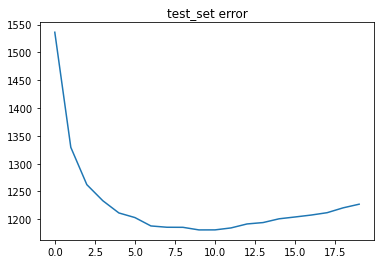

In [50]:
plt.plot(rmse_val)
plt.title("test_set error")
plt.show()

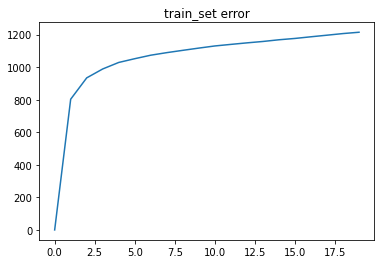

In [49]:
plt.plot(train_rmse)
plt.title("train_set error")
plt.show()

In [52]:
print("rmse on the training set: " ,min(rmse_val) )

rmse on the training set:  1180.8700319127345


## Grid search

In [40]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':range(1, 15)}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_


{'n_neighbors': 9}

In [ ]:
#reading test and submission files
test = pd.read_csv('test_AbJTz2l.csv')
submission = pd.read_csv('sample_submission_8RXa3c6.csv')
submission['Item_Identifier'] = test['Item_Identifier']
submission['Outlet_Identifier'] = test['Outlet_Identifier']

#preprocessing test dataset
test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
test['Item_Weight'].fillna(mean, inplace =True)
test = pd.get_dummies(test)
test_scaled = scaler.fit_transform(test)
test = pd.DataFrame(test_scaled)

#predicting on the test set and creating submission file
predict = model.predict(test)
submission['Item_Outlet_Sales'] = predict
submission.to_csv('submit_file.csv',index=False)